In [1]:
from scipy import stats
srcc = stats.spearmanr( [5,8,-1,2], [6,1,9,3])
srcc[0]

-0.7999999999999999

In [2]:
%cd ..


c:\OTHER\ترم 3\پایاننامه\proposal\knowledge distillation\CKDN_code


In [3]:
import predict_one_image



In [4]:
iqa = predict_one_image.IQA_CKDN()

In [5]:
iqa.predict(restored_addr="images1/restored/3.png" , degraded_addr= "images1/degraded/3.png")  # dist , ref

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


0.3415382

In [6]:
dte = iqa.get_DTE_features("images1/restored/3.png")

In [7]:
dte[0].shape

(256,)

## correlation or cosine distance

In [8]:
from scipy import stats
import numpy as np
from scipy.spatial.distance import cosine


r = "S5/test/r.BMP"
d = "S5/test/i04_10_1.bmp"


rr = iqa.get_DTE_features(r)[0]
dd = iqa.get_DTE_features(d)[0]

srcc = stats.spearmanr( rr , dd)
srcc[0] , cosine(rr, dd)

(0.999831912336919, 2.3543834686279297e-05)

In [9]:
import glob
TID_ADDR = "C:\OTHER\\term2\seminars\papers\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\datasets\TID2013"
dsts = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]


def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)

In [10]:
len(get_images_dst(dsts[7])) , len(refs_for_dst) , len(get_mos_dst(dsts[7]))

(125, 125, 125)

In [11]:
get_images_dst(dsts[7])[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i22_08_3.bmp'

In [12]:
refs_for_dst[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/reference_images\\I22.BMP'

In [13]:
get_mos_dst(dsts[7])[107]

3.783

## test_on_tid_dist

In [64]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('test_on_tid_dist.xlsx')
worksheet = workbook.add_worksheet()

In [65]:
row = 3

preds = []
for c in dsts:
    imgs = get_images_dst(c)
    refs = refs_for_dst
    preds_on_dists = []
    moses = get_mos_dst(c)
    for i in range(len(imgs)):
        score = iqa.predict(imgs[i] , refs[i])
        preds_on_dists.append(score)
        preds.append(score)
       

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( preds_on_dists , moses)[0])

    
    print(row)
    row +=1

workbook.close()      

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


## mos on all imgs

In [66]:
imgs = []
refs = []
moses = []
for c in dsts:
    imgs += get_images_dst(c)
    refs += refs_for_dst
    moses += get_mos_dst(c)

In [67]:
preds = []
for i in range(len(imgs)):
    rr = iqa.predict(imgs[i] , refs[i])
    preds.append(rr)
    
   




len(preds) , len(moses)


c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


(3000, 3000)

In [68]:
stats.spearmanr( preds , moses)[0]

0.5740042107733865

## on contents

In [14]:
contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]


def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

In [15]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('test_on_tid-content.xlsx')
worksheet = workbook.add_worksheet()

In [72]:
row = 3


for c in contents:
    imgs = get_images_content(c)
    refs = get_refs_content(c)
    preds = []
    moses = get_mos_content(c)
    for i in range(len(imgs)):
        rr = iqa.predict(imgs[i] , refs[i])
        
        preds.append(rr)

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( preds , moses)[0])

    
    print(row)
    row +=1

workbook.close() 

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


## on all imgs:

In [79]:
imgs = []
refs = []
moses = []
for c in contents:
    imgs += get_images_content(c)
    refs += get_refs_content(c)
    moses += get_mos_content(c)

In [80]:
cosines = []
for i in range(len(imgs)):
    rr = iqa.predict(imgs[i] , refs[i])
    
    cosines.append(rr)



In [81]:
len(cosines) , len(moses)

(3000, 3000)

In [82]:
stats.spearmanr( cosines , moses)[0]

0.22885525717920874

## dst visualize

In [18]:
row = 3


features = []
dists = []

for c in dsts:
    imgs = get_images_dst(c)
    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features.append(dd)
        dists.append(int(c))
        

  

    
    print(row)
    row +=1



features = np.array(features)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [19]:
features.shape

(3000, 256)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


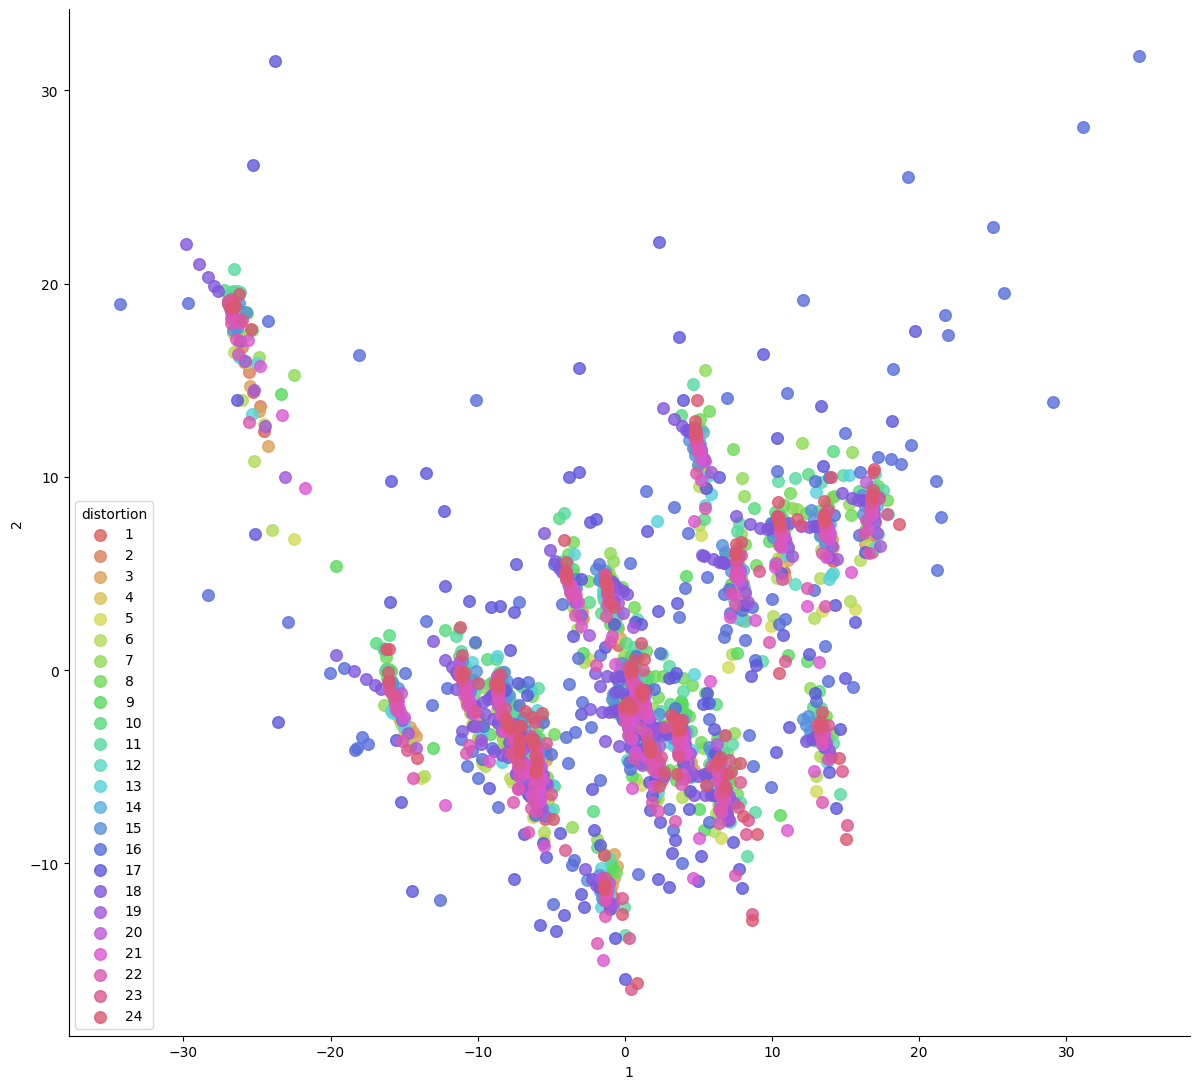

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 



df = pd.DataFrame({'distortion':dists,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False,size= 11, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


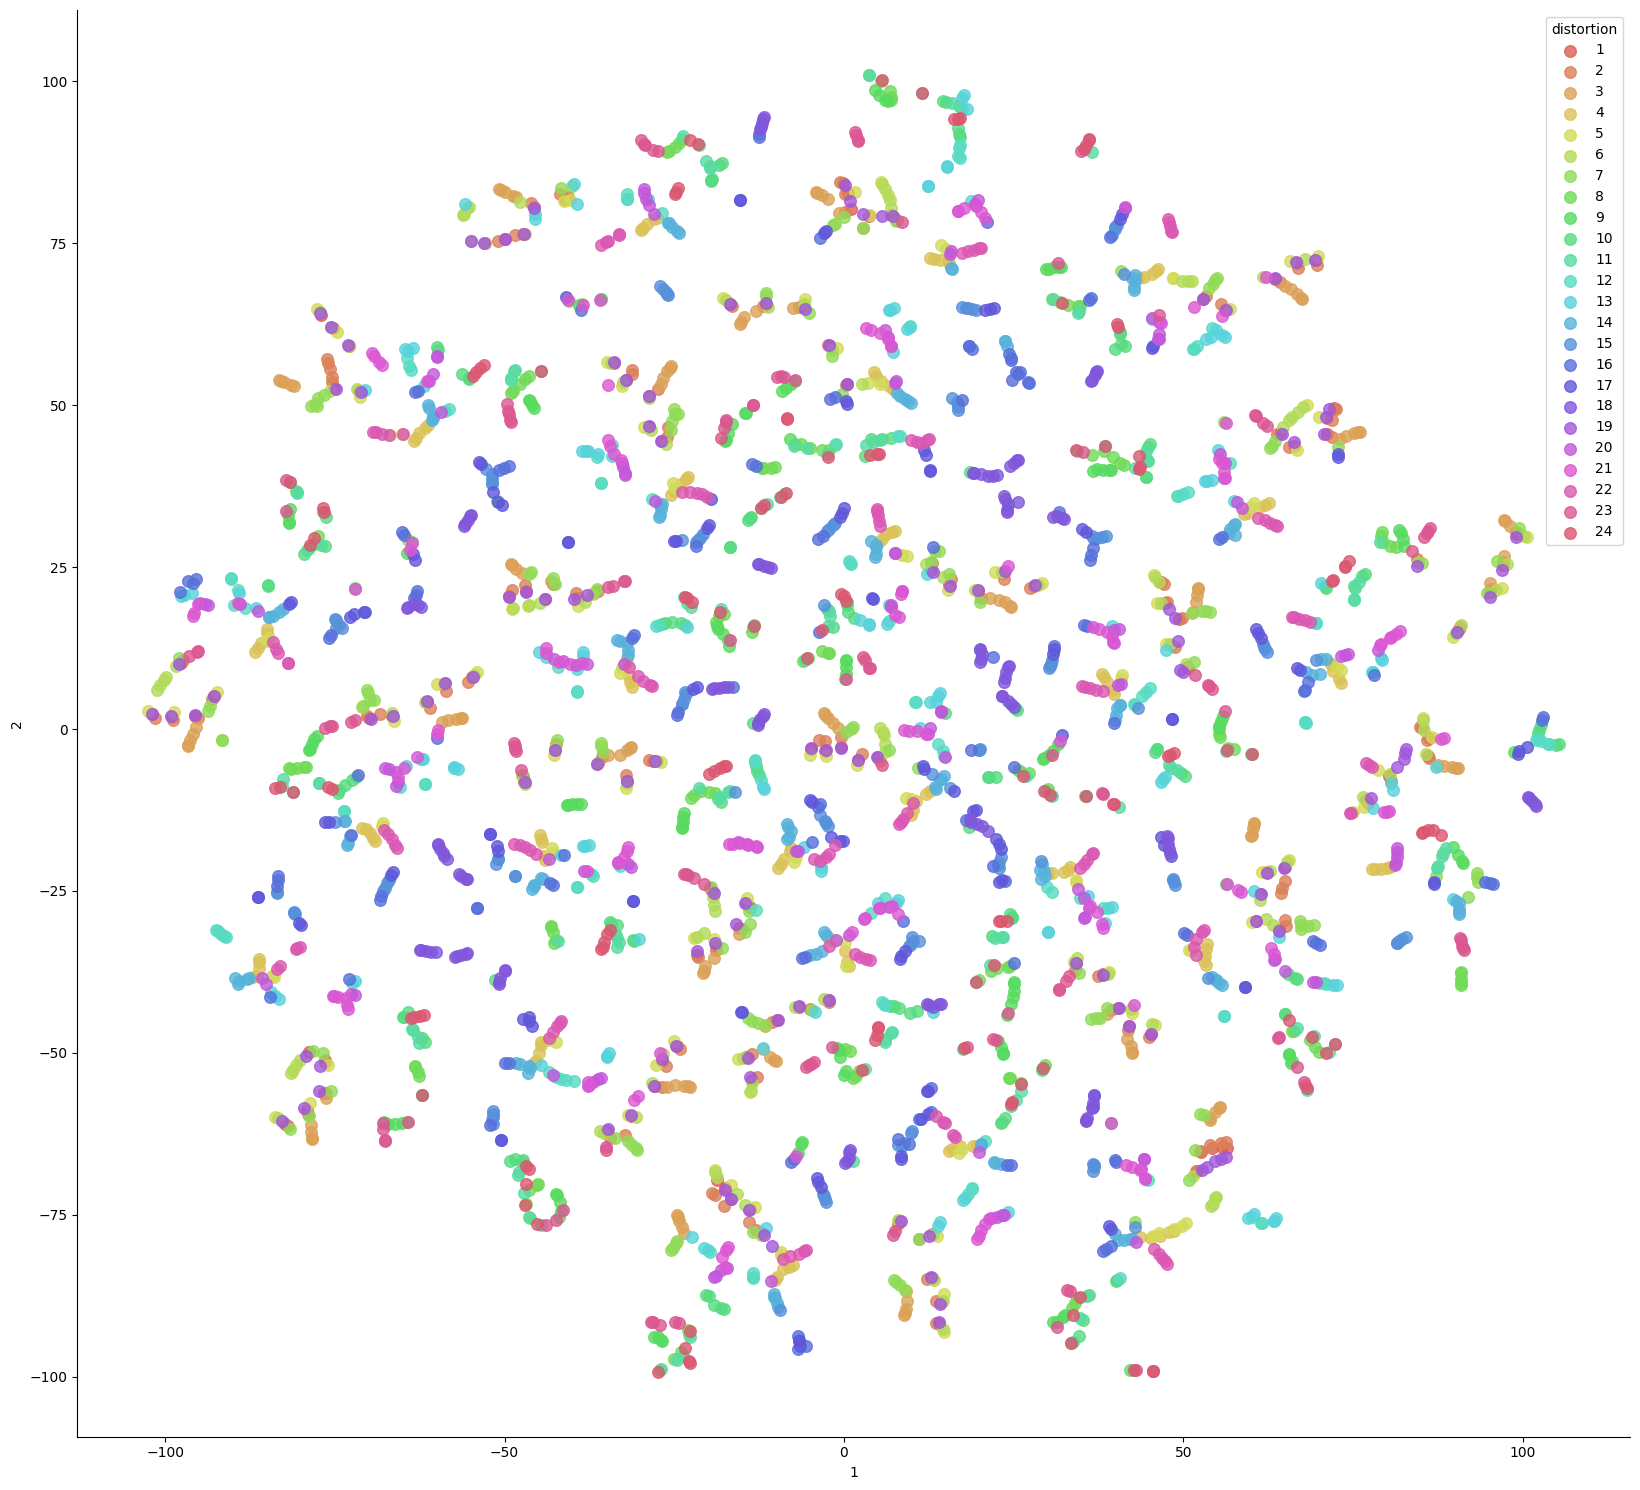

In [25]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

np.random.seed(176)
random.seed(16)

df = pd.DataFrame({'distortion':dists,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()

## content visualize with references


In [49]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref = []
for c in contents:
    
    imgs = get_images_content(c)

    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref.append("0")

    ref = get_refs_content(c)[0]
    dd = iqa.get_DTE_features(ref)[0]
    features1.append(dd)
    contnts.append(c)
    is_ref.append("1")

  

    
    print(row)
    row +=1



features1 = np.array(features1)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [50]:
features1.shape , len(contnts) , len(is_ref)

((3025, 256), 3025, 3025)

<AxesSubplot:xlabel='1', ylabel='2'>

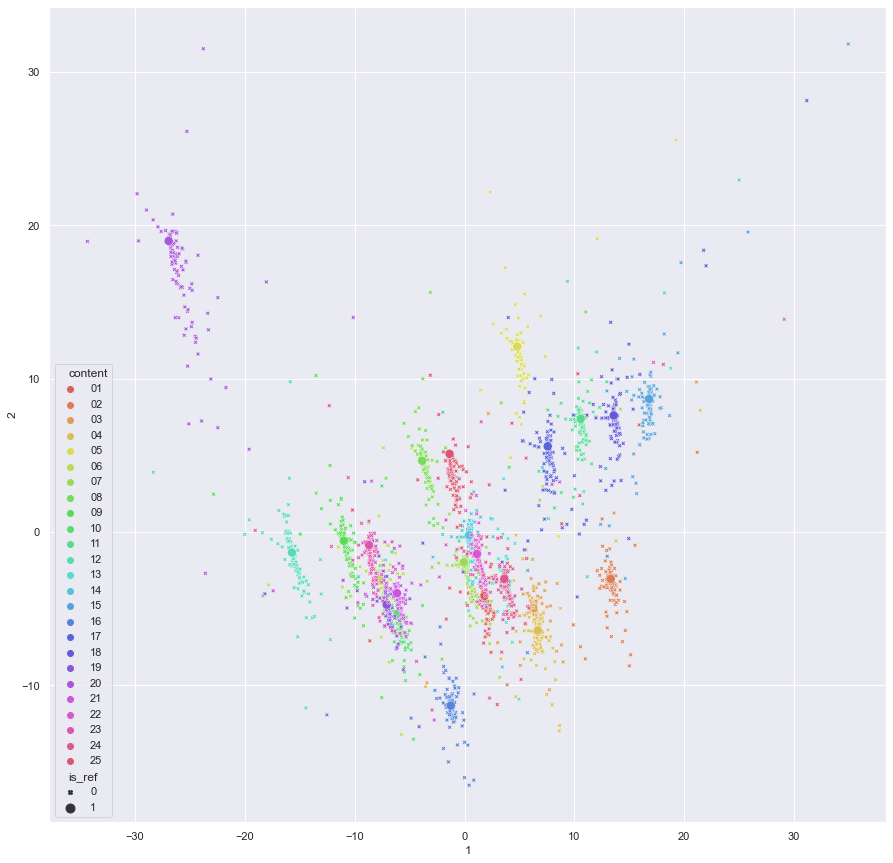

In [58]:
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

<AxesSubplot:xlabel='1', ylabel='2'>

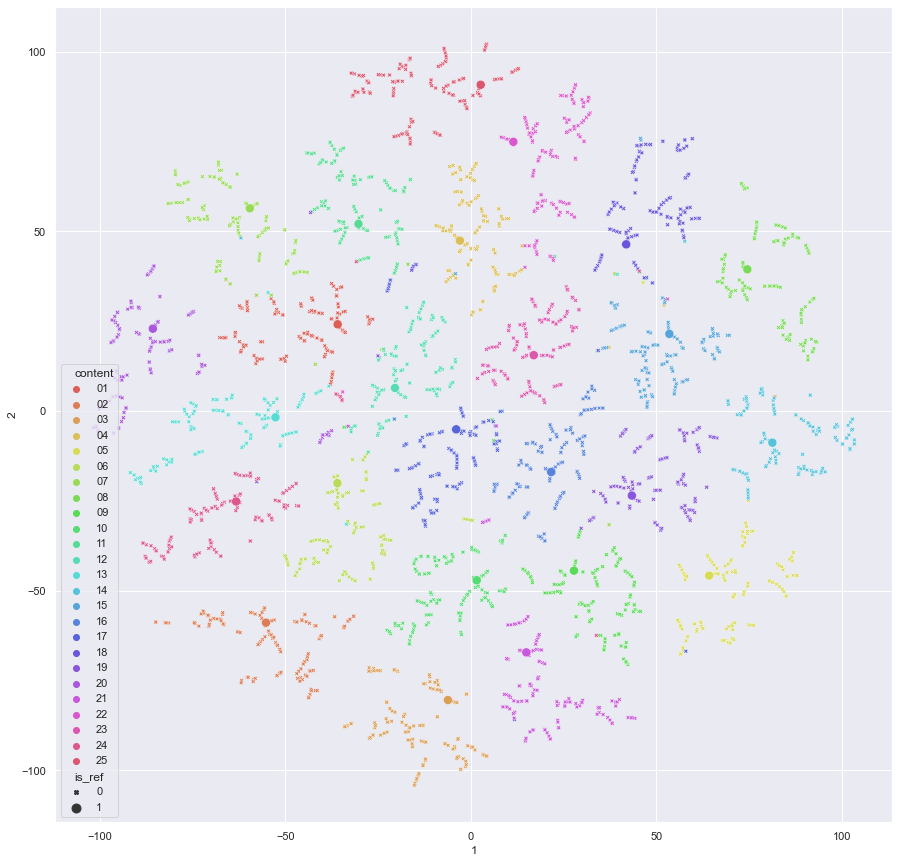

In [62]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref':is_ref
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', size= 'is_ref' , sizes=[18,80]  , markers=["X" , "o"])

# clustring

In [39]:
import numpy as np 

row = 3

features1 = []
contnts = []
for c in contents:
    
    imgs = get_images_content(c)

    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features1.append(dd)
        contnts.append(c)

   

  

    
    print(row)
    row +=1



features1 = np.array(features1)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [40]:
features1.shape , len(contnts) 

((3000, 256), 3000)

In [41]:
features1.shape

(3000, 256)

In [42]:
from sklearn.cluster import KMeans
import numpy as np




kmeans = KMeans(n_clusters=30, random_state=9898, n_init="auto").fit(features1.astype("double"))

kmeans.labels_

array([11, 11, 11, ..., 12, 12, 12])

In [43]:
kmeans.cluster_centers_.shape


(30, 256)

## visualize by refs and centroid:

In [50]:
import numpy as np 

row = 3

features1 = []
contnts = []
is_ref_or_centroid = []
for c in contents:
    
    imgs = get_images_content(c)

    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features1.append(dd)
        contnts.append(c)
        is_ref_or_centroid.append("0")

    ref = get_refs_content(c)[0]
    dd = iqa.get_DTE_features(ref)[0]
    features1.append(dd)
    contnts.append(c)
    is_ref_or_centroid.append("1")

  

    
    print(row)
    row +=1



c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [51]:
features1 = np.array(features1)

is_ref_or_centroid+=(["2","2","2","2","2","2"]*5)
contnts+=(["32","32","32","32","32","32"]*5)

features1 = np.vstack((features1 , kmeans.cluster_centers_))


In [52]:
features1.shape , len(contnts) , len(is_ref_or_centroid)

((3055, 256), 3055, 3055)

<AxesSubplot:xlabel='1', ylabel='2'>

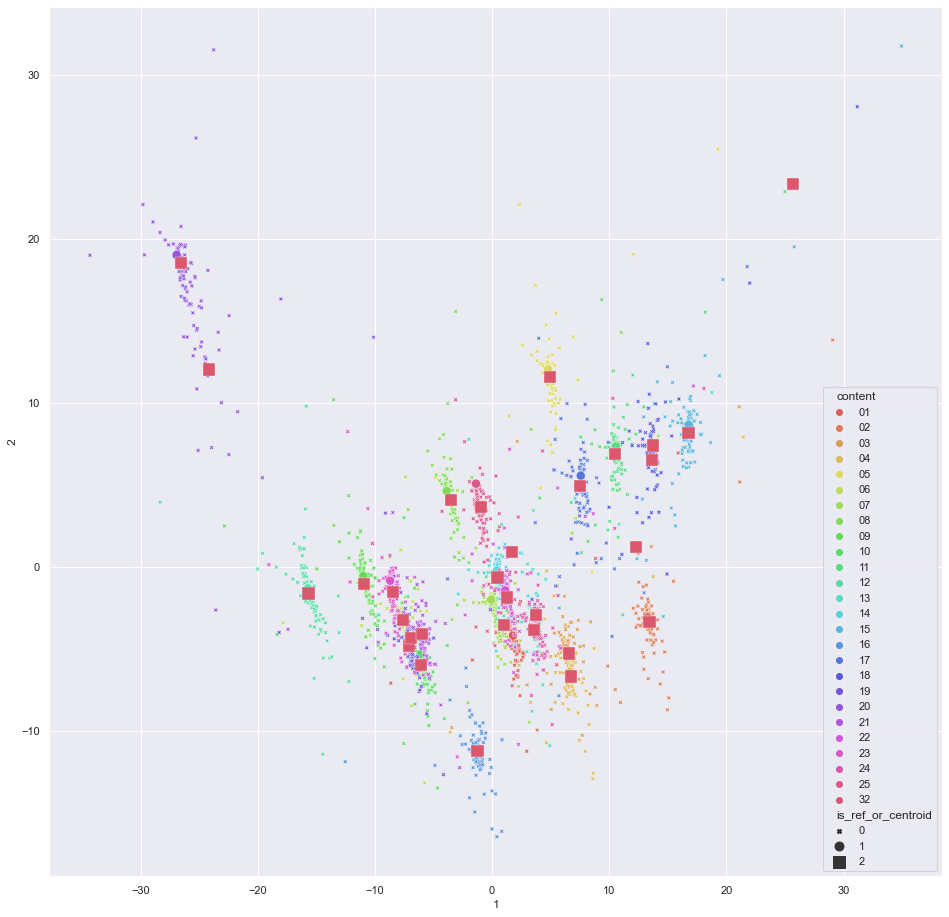

In [53]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               'is_ref_or_centroid':is_ref_or_centroid
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',style = 'is_ref',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()
sns.set(rc={"figure.figsize":(16, 16)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref_or_centroid',palette='hls', size= 'is_ref_or_centroid' , sizes=[18,80 , 150]  , markers=["X" , "o" , "s"])

<AxesSubplot:xlabel='1', ylabel='2'>

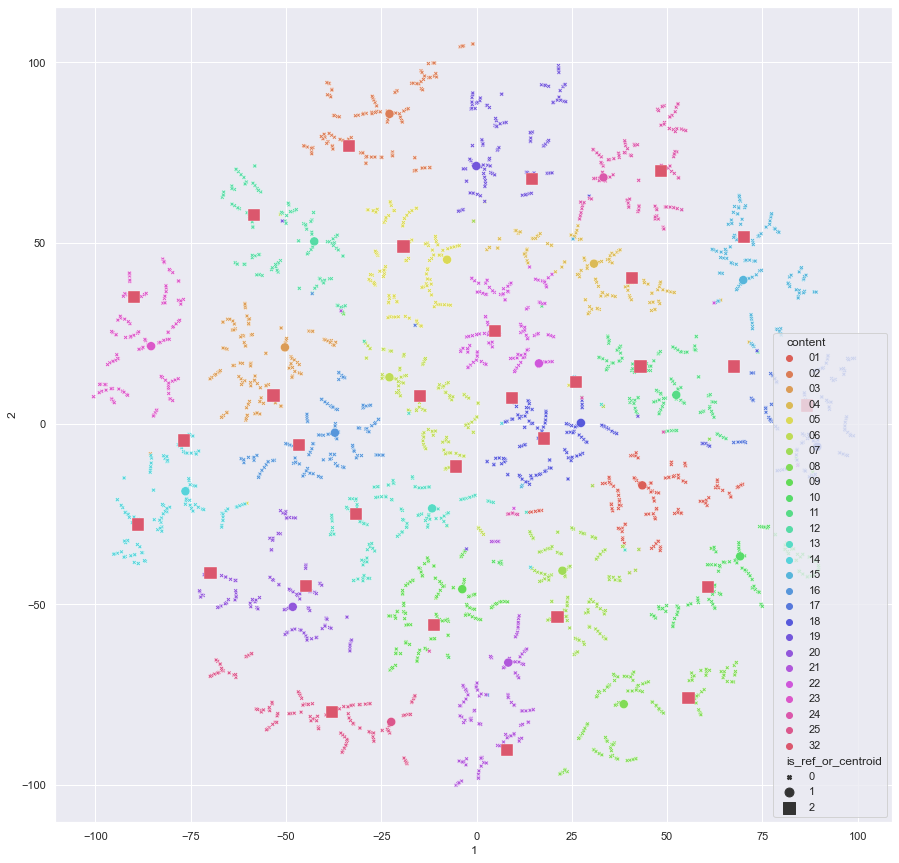

In [54]:
from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               'is_ref_or_centroid':is_ref_or_centroid
               })

# sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})


sns.scatterplot(x='1' , y='2', data=df, hue='content',style = 'is_ref_or_centroid',palette='hls', size= 'is_ref_or_centroid' , sizes=[18,80,150]  , markers=["X" , "o" , "s"])

# test all of tid by centroids of clustering

In [55]:
row = 3


features = []
dists = []
img_names = []
for c in dsts:
    imgs = get_images_dst(c)
    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features.append(dd)
        img_names.append(imgs[i])
        dists.append(int(c))
        

  

    
    print(row)
    row +=1



features = np.array(features)



c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [56]:
img_names = np.array(img_names)
features.shape , img_names.shape

((3000, 256), (3000,))

In [57]:
from sklearn.metrics.pairwise import pairwise_distances_argmin


indices = pairwise_distances_argmin(kmeans.cluster_centers_, features)

# Get the nearest data points to each centroid
nearest_data = img_names[indices]
nearest_data

array(['C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i14_08_3.bmp',
       'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\I10_01_1.bmp',
       'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i18_03_4.bmp',
       'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i02_02_1.bmp',
       'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i20_20_2.bmp',
       'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_rand

In [58]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('test_on_tid_cluster30_dist.xlsx')
worksheet = workbook.add_worksheet()

In [ ]:
row = 3


all_scores = []
all_moses = []


for c in dsts:
    imgs = get_images_dst(c)
    preds_on_dists = []
    moses = get_mos_dst(c)
    for i in range(len(imgs)):

        ff = iqa.get_DTE_features(imgs[i])[0]
        cluster_ref = nearest_data[kmeans.predict([ff])[0]]

        score = iqa.predict(imgs[i] , cluster_ref)
        preds_on_dists.append(score)

        all_scores.append(score)
        all_moses.append(moses[i])


        
       

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( preds_on_dists , moses)[0])

    
    print(row)
    row +=1

workbook.close()   

In [60]:
stats.spearmanr( all_scores , all_moses)[0]

0.4957080584344345

# on all of tid content (clustering)

In [61]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('test_on_tid_cluster30_content.xlsx')
worksheet = workbook.add_worksheet()

In [ ]:
row = 3


all_scores = []
all_moses = []


for c in contents:
    imgs = get_images_content(c)
    preds_on_contents = []
    moses = get_mos_content(c)
    for i in range(len(imgs)):

        ff = iqa.get_DTE_features(imgs[i])[0]
        cluster_ref = nearest_data[kmeans.predict([ff])[0]]

        score = iqa.predict(imgs[i] , cluster_ref)
        preds_on_contents.append(score)

        all_scores.append(score)
        all_moses.append(moses[i])


        
       

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( preds_on_contents , moses)[0])

    
    print(row)
    row +=1

workbook.close()   

In [63]:
stats.spearmanr( all_scores , all_moses)[0]

0.4957080584344345